In [13]:
import time
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from joblib import parallel_backend

In [7]:
mnist = load_digits()

x = mnist.data.astype(np.float32)
y = mnist.target.astype(np.float32)

n_samples, n_features = x.shape
print(f"Num Images: {n_samples}")
print(f"Num Pixels: {n_features}")

Num Images: 1797
Num Pixels: 64


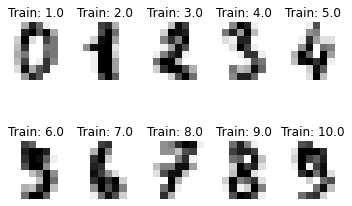

In [3]:
# Plot random images
for index, (image, label) in enumerate(zip(x[:10], y[:10])):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Train: {label + 1}')

#### Data Preprocessing

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
# SVM Gridsearch

parameters = {
    "kernel": ["rbf", "poly", "linear", "sigmoid"],
    "gamma": [0.01, 0.001]
}

svm = SVC()

start_time = time.time()
with parallel_backend('threading',n_jobs=-1):
    clf = GridSearchCV(svm, parameters, cv=10)
clf.fit(x_train, y_train)
end_time = time.time()

print(f"Training done in {end_time - start_time} seconds")

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)

Training done in 6.039306402206421 seconds


In [26]:
# Genauigkeit, confusion matrix
print(f"Score: {score}")
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred)}")

Score: 0.9713804713804713
Confusion matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 54  1  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  2  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  1 70  1  0  0  1]
 [ 1  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  1  1  0  0  0  0 49  0]
 [ 0  0  0  1  0  1  1  1  0 64]]


In [21]:
# PCA - mit 95 prozent varianz

pca = PCA(n_components=0.95)
pca.fit(x_train)
x_train_transformed = pca.transform(x_train)
x_test_transformed = pca.transform(x_test)

print(f"Dimensions vorher: {x_train.shape[1]}")
print(f"Dimensions nachher: {len(pca.components_)}")
print(f"Explained Variance: {round(sum(pca.explained_variance_ratio_), 8)}")

Dimensions vorher: 64
Dimensions nachher: 40
Explained Variance: 0.95402231


In [25]:
parameters = {
    "kernel": ["rbf", "poly", "linear", "sigmoid"],
    "gamma": [0.01, 0.001],
    "max_iter": [1000]
}

svm = SVC()

start_time = time.time()
with parallel_backend('threading',n_jobs=-1):
    clf = GridSearchCV(svm, parameters, cv=10)
clf.fit(x_train_transformed, y_train)
end_time = time.time()

print(f"Training done in {end_time - start_time} seconds")

y_pred = clf.predict(x_test_transformed)
score = clf.score(x_test_transformed, y_test)

Training done in 3.993922472000122 seconds


In [27]:
print(f"Score: {score}")
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred)}")

Score: 0.9713804713804713
Confusion matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 54  1  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  2  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  1 70  1  0  0  1]
 [ 1  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  1  1  0  0  0  0 49  0]
 [ 0  0  0  1  0  1  1  1  0 64]]
